In [ ]:
! pip install pytesseract
!apt-get install -y tesseract-ocr


Original image: 



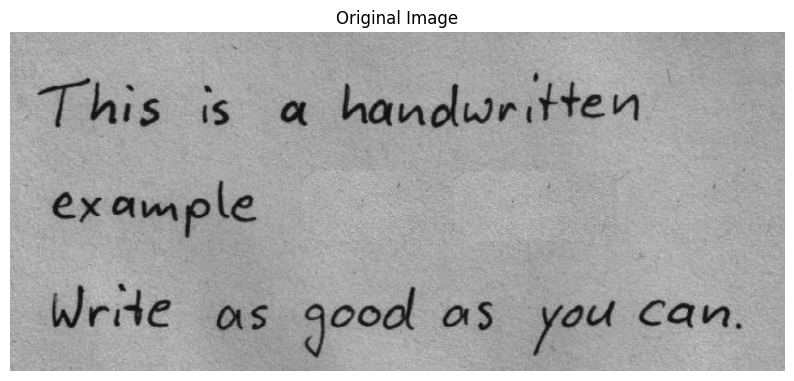


Image with bounding boxes:



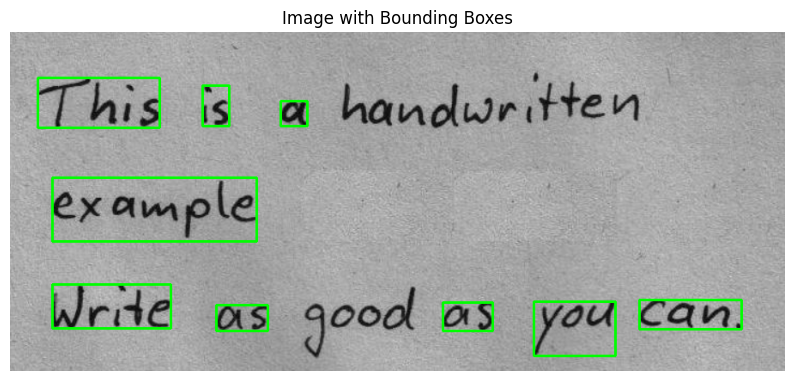


Detected text:

This is a example Wrde as as you Can.


In [9]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
from google.colab import files
import os

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray)
    thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return thresh

def detect_text_regions(image):
    boxes = pytesseract.image_to_data(image, output_type = pytesseract.Output.DICT)
    return boxes

def draw_bounding_boxes(image, boxes):
    output = image.copy()
    n_boxes = len(boxes['level'])
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:
            (x, y, w, h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])
            cv2.rectangle(output, (x,y), (x+w, y+h), (0, 255, 0), 2)
    return output

def get_detected_text(image):
    detected_text = []
    n_boxes = len(boxes['level'])
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:
            detected_text.append(boxes['text'][i])
    return ' '.join(detected_text)

image_path = '/content/example_image.png'
image = cv2.imread(image_path)

#pytesseract.pytesseract.tesseract_cmd = r"D:\Apps\Tesseract\tesseract.exe"

import cv2
import matplotlib.pyplot as plt

if image is None:
    print(f"Error reading the given image file path: {image_path}")
else:
    print("\nOriginal image: \n")
    # Display the original image
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    preprocessed = preprocess_image(image)
    boxes = detect_text_regions(preprocessed)
    image_with_boxes = draw_bounding_boxes(image, boxes)

    print("\nImage with bounding boxes:\n")
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title("Image with Bounding Boxes")
    plt.axis('off')
    plt.show()

    detected_text = get_detected_text(boxes)
    print("\nDetected text:\n")
    print(detected_text)
